# Kadali Sai Vivek
# DS Lab Assignment 9
# 197139

1. Implement Principal Component Analysis from scratch in Python for the following dataset and show the
following steps below.

In [ ]:
#Importing Required Libraries
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler

from math import sqrt
import matplotlib.pyplot as plt


a. Dataset: https://archive.ics.uci.edu/ml/datasets/iris

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving Iris.csv to Iris.csv


In [ ]:
#importing Data
dataset= pd.read_csv('Iris.csv')           
dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


b. Scale the dataset.

In [ ]:
X, Y = dataset.drop(columns = ["Id", "Species"]), dataset['Species']

# using StandardScaler from sklearn.preprocessing
scaler = StandardScaler()
X = scaler.fit_transform(X)

print("X Shape : ",X.shape)

# Converting String into integer for target Variable
for i in range(len(Y)):
  if Y.iat[i] == "Iris-setosa":
    Y.iat[i] = 0
  if Y.iat[i] == "Iris-versicolor":
    Y.iat[i] = 1
  if Y.iat[i] == "Iris-virginica":
    Y.iat[i] = 2

print("Y Shape : ",Y.shape)

X Shape :  (150, 4)
Y Shape :  (150,)


c. Calculate the covariance matrix for the features in the dataset.

In [ ]:
#Calculating the covariance matrix for the features in the dataset.
n=X.shape[0]   
Covariance=np.dot(X.T,X)/(n)
print(Covariance.shape)
print(Covariance)

(4, 4)
[[ 1.         -0.10936925  0.87175416  0.81795363]
 [-0.10936925  1.         -0.4205161  -0.35654409]
 [ 0.87175416 -0.4205161   1.          0.9627571 ]
 [ 0.81795363 -0.35654409  0.9627571   1.        ]]


d. Calculate the eigenvalues and eigenvectors for the covariance matrix.

e. Sort eigenvalues and their corresponding eigenvectors.



In [ ]:
# Calculate the eigenvalues and eigenvectors for the covariance matrix.
def get_eigenvectors(C):
    eigenvalues, eigenvectors = np.linalg.eig(C)
    print("Eigen Values : ",eigenvalues)
    print("Eigen Vector :\n",eigenvectors)
    
    # Sort eigenvalues descending and select columns based on n_components
    n_cols = np.flip(np.argsort(eigenvalues))
    selected_vectors = eigenvectors[:, n_cols]
    return np.flip(np.sort(eigenvalues)),selected_vectors

eigenvalues,eigenvectors = get_eigenvectors(Covariance)

print("\n\nSorted Eigen Values : ",eigenvalues)
print("\nSorted Eigen Vector :\n",eigenvectors)

Eigen Values :  [2.91081808 0.92122093 0.14735328 0.02060771]
Eigen Vector :
 [[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]


Sorted Eigen Values :  [2.91081808 0.92122093 0.14735328 0.02060771]

Sorted Eigen Vector :
 [[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]


f. Plot the principal components and percentage of explained variances.

Sum of  Explained Variance : 1.0
Explained Variance : [0.7277045209380139, 0.23030523267680594, 0.036838319576273884, 0.00515192680890635]


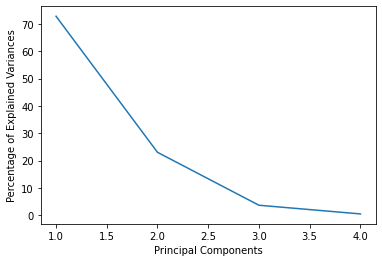

In [ ]:
Explained_Variances = []
for i in range(len(eigenvalues)):
    Explained_Variances.append(eigenvalues[i] / np.sum(eigenvalues))
 
print("Sum of  Explained Variance :",np.sum(Explained_Variances))
print("Explained Variance :", Explained_Variances)


import matplotlib.pyplot as plt
PC = [1,2,3,4]
PEV = []
for i in Explained_Variances:
    PEV.append(i*100)
plt.plot(PC,PEV)
plt.xlabel('Principal Components')
plt.ylabel('Percentage of Explained Variances')
plt.show()

g. Choose first k eigen vectors.

h. Transform the original matrix.

In [ ]:
k = 2 #consider only the features upto where the pov adds to <95% here 2

eisub = eigenvectors[:,0:k]
eisub

X_transformed = np.dot(eisub.T,X.T).T
print("Transformed X :\n", np.around(X_transformed, 2))

Transformed X :
 [[-2.26 -0.51]
 [-2.09  0.66]
 [-2.37  0.32]
 [-2.3   0.58]
 [-2.39 -0.67]
 [-2.07 -1.52]
 [-2.45 -0.07]
 [-2.23 -0.25]
 [-2.34  1.1 ]
 [-2.19  0.45]
 [-2.16 -1.07]
 [-2.33 -0.16]
 [-2.22  0.71]
 [-2.64  0.94]
 [-2.19 -1.89]
 [-2.25 -2.72]
 [-2.2  -1.51]
 [-2.19 -0.51]
 [-1.89 -1.43]
 [-2.34 -1.16]
 [-1.91 -0.43]
 [-2.2  -0.95]
 [-2.77 -0.49]
 [-1.82 -0.11]
 [-2.23 -0.16]
 [-1.96  0.61]
 [-2.05 -0.27]
 [-2.17 -0.55]
 [-2.14 -0.34]
 [-2.27  0.31]
 [-2.14  0.48]
 [-1.83 -0.45]
 [-2.61 -1.83]
 [-2.44 -2.19]
 [-2.19  0.45]
 [-2.21  0.18]
 [-2.04 -0.68]
 [-2.19  0.45]
 [-2.44  0.88]
 [-2.17 -0.29]
 [-2.29 -0.47]
 [-1.87  2.33]
 [-2.56  0.45]
 [-1.96 -0.5 ]
 [-2.13 -1.17]
 [-2.08  0.69]
 [-2.38 -1.15]
 [-2.4   0.36]
 [-2.23 -1.03]
 [-2.21 -0.03]
 [ 1.1  -0.86]
 [ 0.73 -0.6 ]
 [ 1.24 -0.61]
 [ 0.4   1.76]
 [ 1.07  0.21]
 [ 0.38  0.59]
 [ 0.75 -0.78]
 [-0.5   1.85]
 [ 0.93 -0.03]
 [ 0.    1.03]
 [-0.12  2.66]
 [ 0.44  0.06]
 [ 0.55  1.77]
 [ 0.72  0.19]
 [-0.04  0.43]
 [ 0.88 

2. Implement PCA and Logistic Regression for the following dataset by performing the required steps.

In [ ]:
import pandas as pd
import numpy as np

a. Dataset: https://www.kaggle.com/datasets/dileep070/heart-disease-prediction-using-logistic-regression

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving framingham.csv to framingham.csv


b. Loading the dataset

In [ ]:
#importing Data
dataset= pd.read_csv('framingham.csv')   
dataset = dataset.dropna()      # Drop NaN values   
dataset

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4231,1,58,3.0,0,0.0,0.0,0,1,0,187.0,141.0,81.0,24.96,80.0,81.0,0
4232,1,68,1.0,0,0.0,0.0,0,1,0,176.0,168.0,97.0,23.14,60.0,79.0,1
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0


c. Scale the dataset

In [ ]:
X, Y = dataset.drop(columns = ["TenYearCHD"]), dataset['TenYearCHD']
# Scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)
print("X  Shape : ",X.shape)
print("Y Shape : ",Y.shape)

X  Shape :  (3656, 15)
Y Shape :  (3656,)


d. Select the principal components

In [ ]:
#Calculating the covariance matrix for the features in the dataset.
n=X.shape[0]   
Covariance=np.dot(X.T,X)/(n)
print(Covariance.shape)
print(np.around(Covariance,3))

(15, 15)
[[ 1.    -0.024  0.018  0.207  0.331 -0.052 -0.002  0.001  0.014 -0.07
  -0.045  0.052  0.073 -0.115  0.003]
 [-0.024  1.    -0.159 -0.211 -0.189  0.135  0.051  0.307  0.109  0.268
   0.389  0.209  0.137 -0.003  0.118]
 [ 0.018 -0.159  1.     0.025  0.014 -0.014 -0.03  -0.079 -0.04  -0.013
  -0.125 -0.059 -0.137 -0.064 -0.032]
 [ 0.207 -0.211  0.025  1.     0.774 -0.052 -0.038 -0.108 -0.042 -0.051
  -0.134 -0.116 -0.16   0.05  -0.053]
 [ 0.331 -0.189  0.014  0.774  1.    -0.046 -0.036 -0.07  -0.037 -0.03
  -0.095 -0.057 -0.087  0.064 -0.054]
 [-0.052  0.135 -0.014 -0.052 -0.046  1.     0.113  0.263  0.049  0.094
   0.271  0.2    0.106  0.013  0.054]
 [-0.002  0.051 -0.03  -0.038 -0.036  0.113  1.     0.066  0.01   0.013
   0.061  0.056  0.036 -0.017  0.016]
 [ 0.001  0.307 -0.079 -0.108 -0.07   0.263  0.066  1.     0.081  0.167
   0.698  0.618  0.303  0.147  0.087]
 [ 0.014  0.109 -0.04  -0.042 -0.037  0.049  0.01   0.081  1.     0.048
   0.103  0.051  0.089  0.061  0.615]
 [-

In [ ]:
# Calculating the eigenvalues and eigenvectors for the covariance matrix
def get_eigenvectors(C):
    eigenvalues, eigenvectors = np.linalg.eig(C)
    print("Eigen Values : ", np.around(eigenvalues, 3))
    print("Eigen Vector :\n", np.around(eigenvectors,3))
    
    # Sort eigenvalues descending and select columns based on n_components
    n_cols = np.flip(np.argsort(eigenvalues))
    selected_vectors = eigenvectors[:, n_cols]
    return np.flip(np.sort(eigenvalues)),selected_vectors

eigenvalues,eigenvectors = get_eigenvectors(Covariance)

print("\nSorted Eigen Values : ", np.around(eigenvalues,3))
print("\n\nSorted Eigen Vector :\n", np.around(eigenvectors,3))

Eigen Values :  [3.229 1.884 1.568 0.172 0.212 0.376 0.391 0.584 0.692 0.791 0.872 1.12
 1.007 1.058 1.045]
Eigen Vector :
 [[ 0.055 -0.364  0.043 -0.077 -0.125 -0.024 -0.022  0.273  0.595 -0.007
   0.182 -0.528  0.171  0.263 -0.027]
 [-0.295  0.096  0.026  0.151  0.001  0.092  0.06  -0.593  0.25  -0.334
  -0.077 -0.122  0.244 -0.01   0.512]
 [ 0.107  0.017 -0.031 -0.036  0.003  0.014 -0.003 -0.309  0.056 -0.05
   0.292  0.004  0.546 -0.417 -0.573]
 [ 0.2   -0.588  0.051  0.024 -0.681 -0.005  0.024 -0.178 -0.241 -0.033
  -0.096  0.11  -0.017 -0.137  0.122]
 [ 0.169 -0.633  0.043  0.008  0.719  0.02   0.014 -0.134 -0.118  0.01
  -0.03   0.035  0.007 -0.065  0.113]
 [-0.209 -0.043 -0.053  0.037 -0.002  0.051  0.046  0.015  0.301  0.493
  -0.539 -0.147 -0.089 -0.54  -0.027]
 [-0.068  0.017 -0.027 -0.009  0.002  0.006 -0.004 -0.008 -0.06  -0.16
   0.531 -0.342 -0.541 -0.507  0.124]
 [-0.43  -0.16  -0.121  0.147  0.01  -0.583 -0.571  0.065 -0.082 -0.212
  -0.106 -0.012  0.022 -0.029 -0.135]

e. Build the Logistic regression model with the transformed dataset.

Sum of  Explained Variance : 1.0
Explained Variance : [0.215 0.126 0.105 0.075 0.071 0.07  0.067 0.058 0.053 0.046 0.039 0.026
 0.025 0.014 0.011]


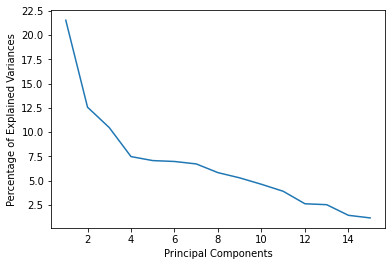

In [ ]:
#Plot the principal components and percentage of explained variances.
explained_variances = []
for i in range(len(eigenvalues)):
    explained_variances.append(eigenvalues[i] / np.sum(eigenvalues))
 
print("Sum of  Explained Variance :",np.sum(explained_variances))
print("Explained Variance :", np.around(explained_variances, 3))


#Plot the principal components and percentage of explained variances.
import matplotlib.pyplot as plt
x = [i for i in range(1,16)]
q = []
for i in explained_variances:
    q.append(i*100)
plt.plot(x,q)
plt.xlabel('Principal Components')
plt.ylabel('Percentage of Explained Variances')
plt.show()



In [ ]:
#consider only the features upto where the pov adds to <95%
k = 0
sum = 0
while sum < 95:
    sum = sum + q[k]
    k = k+1
k = k-1
print("k : ",k)
eisub = eigenvectors[:,0:k]
print(eisub)

X_transformed = np.dot(eisub.T,X.T).T
print("Transformed X :\n", np.around(X_transformed, 2))

k :  12
[[ 0.05467462 -0.36389546  0.04310623 -0.52764457  0.2633536  -0.02674147
   0.1710008   0.18215532 -0.00682477  0.59547196  0.27319947 -0.02152826]
 [-0.2948085   0.09611887  0.02580589 -0.12167369 -0.00957423  0.51175022
   0.24406496 -0.07690297 -0.33419181  0.25049638 -0.59305266  0.06048594]
 [ 0.10745757  0.01691292 -0.03083472  0.00370124 -0.41679434 -0.57256411
   0.54604146  0.29162626 -0.04982949  0.05607413 -0.30871516 -0.00327381]
 [ 0.19954607 -0.58809556  0.05063284  0.11046361 -0.13725217  0.12246109
  -0.01739216 -0.09587546 -0.0331284  -0.2408757  -0.17797681  0.02360533]
 [ 0.16949064 -0.63266357  0.04293371  0.03510651 -0.06546762  0.11340509
   0.00674547 -0.03019626  0.00958544 -0.11791034 -0.13422276  0.01434833]
 [-0.20878548 -0.04274692 -0.05277178 -0.14740065 -0.5397049  -0.02742394
  -0.08881837 -0.53877469  0.49282497  0.30104167  0.01465222  0.04632822]
 [-0.0683295   0.01711142 -0.02703162 -0.34191905 -0.50734591  0.12377503
  -0.54106591  0.5313677